<a href="https://colab.research.google.com/github/hariszaf/metabolic_toy_model/blob/main/Antony2025/introductionToCOBRApy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to COBRApy**

### **Prepare your environment**

To run this note, you need COBRApy and gurobi. [See the notebook on preparing your environment for a more detailed explanation](preparingYourEnvironment.ipynb)

In [1]:
# @title
import os
def create_gurobi_license():
    license_content = (
        "# Gurobi WLS license file\n"
        "# Your credentials are private and should not be shared or copied to public repositories.\n"
        "# Visit https://license.gurobi.com/manager/doc/overview for more information.\n"
        "WLSACCESSID=1fedf73b-9471-4da8-bdc7-2aaacf2e30f3\n"
        "WLSSECRET=3bc7d209-a4ec-4195-98be-4b254f181512\n"
        "LICENSEID=940603"
    )
    with open("/content/licenses/gurobi.lic", "w") as f:
        f.write(license_content)
    print("License file created at /content/licenses/gurobi.lic")



# Create directory for the license
os.makedirs("/content/licenses", exist_ok=True)

# Generate the license file
create_gurobi_license()

#add to path
os.environ['GRB_LICENSE_FILE'] = '/content/licenses/gurobi.lic'

License file created at /content/licenses/gurobi.lic


In [2]:
# @title
!pip install gurobipy
!pip install cobra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 34.5 MB/s eta 0:00:00


In [3]:
# @title
import gurobipy
from gurobipy import Model
model = Model("test")
print("Gurobi is working!", "\U0001F600")

#install COBRApy
import cobra
from cobra.io import load_model
model = load_model("textbook")
solution = model.optimize()
print(f"flux balance analysis solution is {solution.objective_value}")
print("COBRApy is working", "\U0001F600")

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 940603
Academic license 940603 - for non-commercial use only - registered to da___@gmail.com
Gurobi is working! 😀
flux balance analysis solution is 0.8739215069684305
COBRApy is working 😀


In [4]:
!git clone https://github.com/hariszaf/metabolic_toy_model.git
files_path = "metabolic_toy_model/Antony2025/files"

Cloning into 'metabolic_toy_model'...
remote: Enumerating objects: 476, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 476 (delta 47), reused 43 (delta 13), pack-reused 385 (from 1)
Receiving objects: 100% (476/476), 57.87 MiB | 15.21 MiB/s, done.
Resolving deltas: 100% (235/235), done.
Updating files: 100% (145/145), done.


### **Illustration with three gut species**

![gutSpecies](https://github.com/hariszaf/metabolic_toy_model/blob/main/Antony2025/images/multistabilityPaper.png?raw=1)

### **Bonus quest**

1) Get the three toy models

In [16]:
# @title
sugar_fermenter = cobra.io.read_sbml_model(files_path + "/models/sugar_fermenter_toy_model.xml")
butyrate_producer = cobra.io.read_sbml_model(files_path + "/models/butyrate_producer_toy_model.xml")
acetogen = cobra.io.read_sbml_model(files_path + "/models/acetogen_toy_model.xml")

2) Find their exchange reactions

In [17]:
# @title

def findExchanges(model):
    for reaction in model.reactions:
        if 'EX_' in reaction.id: #alternatively use i in model.exchanges
            reac_string = reaction.build_reaction_string(use_metabolite_names =True)

            print(f"{reaction.id}\t{reac_string}")


print("Sugar fermenter:")
findExchanges(sugar_fermenter)

print("\nButyrate producer:")
findExchanges(butyrate_producer)

print("\nAcetogen:")
findExchanges(acetogen)

Sugar fermenter:
EX_cpd00027_e	D-Glucose <=> 
EX_cpd00159_e	L-Lactate --> 
EX_cpd00047_e	Formate --> 
EX_cpd00029_e	Acetate --> 
EX_cpd00036_e	Succinate --> 
EX_cpd00067_e	H+ <=> 

Butyrate producer:
EX_cpd00027_e	D-Glucose <=> 
EX_cpd00159_e	L-Lactate --> 
EX_cpd00029_e	Acetate --> 
EX_cpd00011_e	CO2 --> 
EX_cpd11640_e	H2 --> 
EX_cpd00211_e	Butyrate --> 
EX_cp00067_e	H+ <=> 

Acetogen:
EX_cpd00027_e	D-Glucose <=> 
EX_cpd00159_e	L-Lactate --> 
EX_cpd00029_e	Acetate --> 
EX_cpd00011_e	CO2 <=> 
EX_cpd11640_e	H2 <=> 
EX_cpd00047_e	Formate --> 
EX_cp00067_e	H+ <=> 


3) Make a medium based on their exchange reactions like a python dictionary

[exchange_reaction] : -10

the `-10` is an arbitrary number representing the maximum amount of the compound that the strain can import from the enviroment.

In [18]:
# @title
def makeMediumFromModels(modelList):
    medium = {}

    for model in modelList:
        for reaction in model.exchanges:
            medium[reaction.id] = -10

    return medium

medium = makeMediumFromModels([sugar_fermenter, butyrate_producer, acetogen])
print(medium)

{'EX_cpd00027_e': -10, 'EX_cpd00159_e': -10, 'EX_cpd00047_e': -10, 'EX_cpd00029_e': -10, 'EX_cpd00036_e': -10, 'EX_cpd00067_e': -10, 'EX_cpd00011_e': -10, 'EX_cpd11640_e': -10, 'EX_cpd00211_e': -10, 'EX_cp00067_e': -10}


4) Make a function to generate a random medium for these exchange reactions

[exchange_reaction] : random lower limit

In [19]:
# @title
import numpy as np

def makeRandomMedium(medium_dict):
    return {reaction: -1*np.random.uniform() for reaction in medium_dict}



med1 = makeRandomMedium(medium)
med2 = makeRandomMedium(medium)
med3 = makeRandomMedium(medium)

print(f"{med1}\n\n{med2}\n\n{med3}")

{'EX_cpd00027_e': -0.2661104712615142, 'EX_cpd00159_e': -0.46613224439551804, 'EX_cpd00047_e': -0.9131611878927998, 'EX_cpd00029_e': -0.056807493453787106, 'EX_cpd00036_e': -0.5080862729141775, 'EX_cpd00067_e': -0.8230210988960975, 'EX_cpd00011_e': -0.9196626732387502, 'EX_cpd11640_e': -0.13651852417869637, 'EX_cpd00211_e': -0.7187239598020081, 'EX_cp00067_e': -0.7784388819079604}

{'EX_cpd00027_e': -0.4063576156888622, 'EX_cpd00159_e': -0.5146333013765694, 'EX_cpd00047_e': -0.33696347011538186, 'EX_cpd00029_e': -0.8082760187141214, 'EX_cpd00036_e': -0.8171375673363868, 'EX_cpd00067_e': -0.14436151577759715, 'EX_cpd00011_e': -0.38827780718973093, 'EX_cpd11640_e': -0.054442236870581806, 'EX_cpd00211_e': -0.08418236728378659, 'EX_cp00067_e': -0.6481180333005802}

{'EX_cpd00027_e': -0.3068647761943407, 'EX_cpd00159_e': -0.6884461510966167, 'EX_cpd00047_e': -0.27343243598226663, 'EX_cpd00029_e': -0.6260702594598492, 'EX_cpd00036_e': -0.9148723832800858, 'EX_cpd00067_e': -0.1862880394356585

5) Make a function to apply a medium to a model

```python
def applyMedium(model, medium_dict):
    #return the growth rate of the model in this medium

```

In [21]:
# @title
def applyMedium(model, medium_dict):
    for reaction in medium_dict:
        if model.reactions.has_id(reaction):
            model.reactions.get_by_id(reaction).lower_bound = medium_dict[reaction]

    solution = model.optimize()
    return solution.objective_value

print(f"sugar fermenter: {applyMedium(sugar_fermenter, med1)}")
print(f"\nbutyrate producer: {applyMedium(butyrate_producer, med1)}")
print(f"\nacetogen: {applyMedium(acetogen, med1)}")


sugar fermenter: 0.21288837700921137

butyrate producer: 0.2351520335519112

acetogen: 0.17319167603046173


6) Apply 1000 random medias to each model and store their growth rates, visualize with an histogram

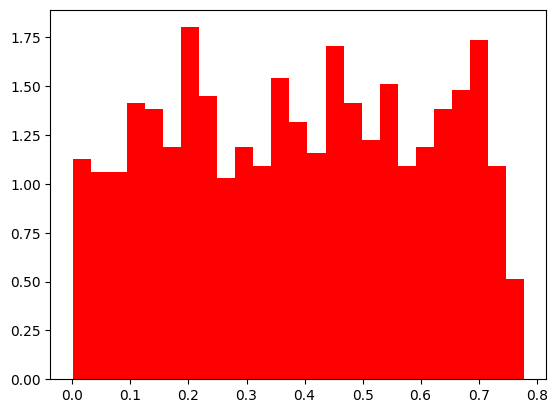

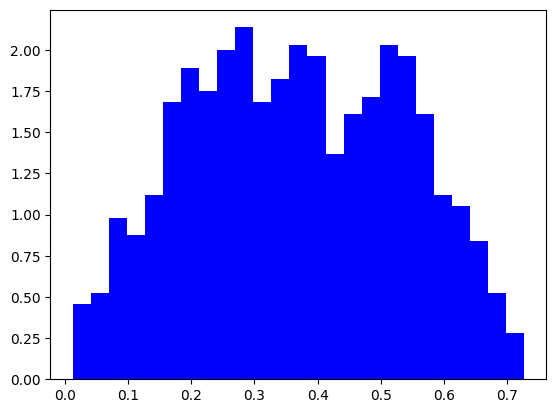

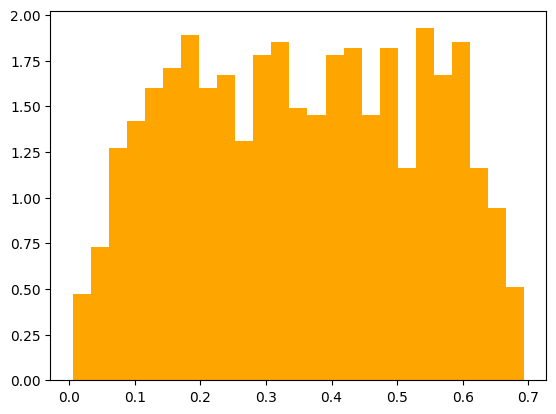

In [22]:
# @title
sf = np.zeros(1000)
bp = np.zeros(1000)
ac = np.zeros(1000)

for i in range(1000):
    medium = makeRandomMedium(medium)
    sf[i] = applyMedium(sugar_fermenter, medium)
    bp[i] = applyMedium(butyrate_producer, medium)
    ac[i] = applyMedium(acetogen, medium)

import matplotlib.pyplot as plt

plt.hist(sf, 25, density=True, color = 'red')
plt.show()
plt.hist(bp, 25,  density=True, color = 'blue')
plt.show()
plt.hist(ac, 25,  density=True, color = 'orange')
plt.show()